In [ ]:
!python3 -m venv tutorial-env
!source tutorial-env/bin/activate
!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download pl_core_news_sm

Error: Command '['/content/tutorial-env/bin/python3', '-Im', 'ensurepip', '--upgrade', '--default-pip']' returned non-zero exit status 1.
/bin/bash: tutorial-env/bin/activate: No such file or directory
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 22.8 MB/s 
     |████████████████████████████████| 1.2 MB 53.9 MB/s 
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0+zzzcolab20220506162203 requires tf-estimator-nightly==2.8.0.dev2021122109, wh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 660.6/660.6 kB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 457.1/457.1 kB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.6/181.6 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 kB 6.8 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.2.0
    Uninstalling typing_extensions-4.2.0:
      Successfully uninstalled typing_extensions-4.2.0
  Attempting uninstall: smart-open
    Found existing installation: smart-open 6.0.0
    Uninstalling smart-open-6.0.0:
      Successfully uni

In [ ]:
import spacy
nlp = spacy.load("pl_core_news_sm")

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
def spacy_tokeniser(sentence):
  return [token.text for token in nlp.tokenizer(sentence)]

In [ ]:
!wget https://klejbenchmark.com/static/data/klej_cbd.zip
!unzip klej_cbd.zip


!gzip.open('klej_cbd.zip', mode='rb', compresslevel=9, encoding=None, errors=None, newline=None)¶

--2022-05-28 22:42:26--  https://klejbenchmark.com/static/data/klej_cbd.zip
Resolving klejbenchmark.com (klejbenchmark.com)... 35.234.99.58
Connecting to klejbenchmark.com (klejbenchmark.com)|35.234.99.58|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 375476 (367K) [application/zip]
Saving to: ‘klej_cbd.zip’

klej_cbd.zip        100%[===================>] 366.68K  1.02MB/s    in 0.4s    

2022-05-28 22:42:26 (1.02 MB/s) - ‘klej_cbd.zip’ saved [375476/375476]

Archive:  klej_cbd.zip
  inflating: test_features.tsv       
  inflating: train.tsv               
/bin/bash: -c: line 0: syntax error near unexpected token `'klej_cbd.zip','
/bin/bash: -c: line 0: `gzip.open('klej_cbd.zip', mode='rb', compresslevel=9, encoding=None, errors=None, newline=None)¶'


In [ ]:
!ls klej_cbd.zip

klej_cbd.zip


In [ ]:
ls

klej_cbd.zip  sample_data/  test_features.tsv  train.tsv  tutorial-env/


In [ ]:
import pandas as pd
import random
import numpy as np




df_train = pd.read_csv("train.tsv", sep='\t')
df_test = pd.read_csv("test_features.tsv", sep='\t')


df_test

,sentence
0,"@anonymized_account Spoko, jak im Duda z Moraw..."
1,@anonymized_account @anonymized_account Ale on...
2,@anonymized_account No czy Prezes nie miał rac...
3,@anonymized_account @anonymized_account Przeci...
4,@anonymized_account @anonymized_account Owszem...
...,...
995,"@anonymized_account Olej jak kto sie ubiera, p..."
996,@anonymized_account to oczywiste byłyście dziś...
997,@anonymized_account Duda może się przyjąć w bi...
998,"@anonymized_account Ty jesteś jebnięty, tła ta..."


# PODZIAŁ NA ZBIÓR TESTOWY ORAZ TRENINGOWY

In [ ]:






len_of_target_1 = 0.2 * len(df_train[df_train['target'] == 1])


df_hate = df_train[df_train['target'] == 1]
remove_n = int(len_of_target_1)
drop_indices = np.random.choice(df_hate.index, remove_n, replace=False)
df_train_hate = df_hate.drop(drop_indices)



df_test_hate = df_train.filter(items = drop_indices, axis=0)



len_of_target_0 = 0.2 * len(df_train[df_train['target'] ==0])

df_neutral = df_train[df_train['target'] == 0]
remove_n = int(len_of_target_0)
drop_indices = np.random.choice(df_neutral.index, remove_n, replace = False)
df_train_neutral = df_neutral.drop(drop_indices)

df_test_neutral = df_train.filter(items = drop_indices, axis = 0)

df_train_new = pd.concat([df_train_neutral, df_train_hate], axis=0)

df_test_new = pd.concat([df_test_neutral, df_test_hate], axis = 0)

df_train_new = df_train_new.sample(frac = 1).reset_index(drop = True)
df_test_new = df_test_new.sample(frac = 1).reset_index(drop = True)


'''
print(df_train_new)
print(df_test_new)
'''                       


'\nprint(df_train_new)\nprint(df_test_new)\n'

In [ ]:
df_test_new

,sentence,target
0,RT @anonymized_account @anonymized_account No ...,0
1,Chciałabym się spotkać i porozmawiać z K ale m...,0
2,@anonymized_account To nie matematyczne wylicz...,0
3,@anonymized_account @anonymized_account @anony...,0
4,@anonymized_account @anonymized_account @anony...,0
...,...,...
2003,@anonymized_account @anonymized_account @anony...,0
2004,"@anonymized_account A to ja przepraszam, nie m...",0
2005,"Panie i panowie, totalna porażka @anonymized_a...",0
2006,@anonymized_account @anonymized_account Gdyby ...,0


In [ ]:
print(df_train_new['target'].value_counts())

0    7352
1     681
Name: target, dtype: int64


In [ ]:
print(df_train_new['sentence'].value_counts())

#NAME?                                                                                                                                    10
@anonymized_account PiSkomuna - kurwa, zdzira!\nChciwie w kieszeń Ci spozira\nI wyciąga z niej dukaty. \nChce tu Moskwę mieć. Na raty!     2
@anonymized_account @anonymized_account taki macie dar przekonywania że nawet pasiaków i legionistów zdołałyście namówić ? :)              1
@anonymized_account Z tego co wiem, większość katechetów nie ma żadnego wykształcenia poza kiepskim katechizmowym.                         1
@anonymized_account Kolejny filar inteligencji z PiSu                                                                                      1
                                                                                                                                          ..
@anonymized_account Kurwa mać dalej problemy ze stroną... Żenada.                                                                          1
@anonymized_a

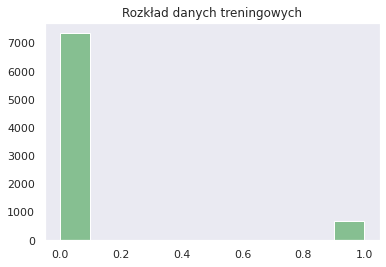

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
df_train_new['target'].hist(grid=False, color='#86bf91')
plt.title("Rozkład danych treningowych")
plt.show()

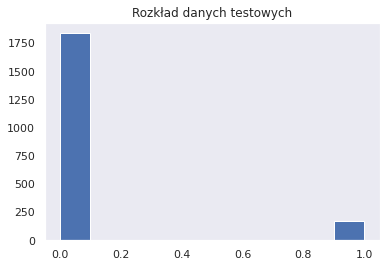

In [ ]:
sns.set()
df_test_new['target'].hist(grid=False)
plt.title("Rozkład danych testowych")
plt.show()

In [ ]:
X_train_raw = df_train_new['sentence']
y_train_labels = df_train_new['target']
X_test_raw = df_test_new['sentence']
y_test_labels = df_test_new['target']

TFIDF VECTORIZER

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf_vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5, min_df=2, analyzer='word', tokenizer=spacy_tokeniser, norm=None) # stworzyłem model tfidf dot tych danych

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_raw) # zaimplementowalem model

tfidf_matrix_array = X_train_tfidf.toarray() # do arrayu

pd_tfidf_matrix = pd.DataFrame(data=tfidf_matrix_array, columns=tfidf_vectorizer.get_feature_names_out()) # dataframe gdzie kolumny to cechy a wiersze reprezentuja dane dokumenty w modelu tfidf
pd_tfidf_matrix



,,,,!,"""",#,%,','',(,...,🙏,🤔,🤗,🤣,🤦,🤭,🤷,🥀,🥂,󠁧󠁢󠁥󠁮󠁧󠁿
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print(X_train_tfidf.get_shape()[1]) # Liczba cech wektora tfidf
print(X_train_tfidf.get_shape()[0]) # liczba dokumentow 

7673
8033


SVD

In [ ]:


# Teraz zastosowalem model SVD aby zredukowac wymiary macierzy - aby zmniejszyc liczbe cech do mozliwego bardziej trafnego zestawu tematow. 
#Dzięki temu jest mniej cech niż w wektorach tfidf i to są mocniejsze cechy.


from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

svd = TruncatedSVD(n_components=30, n_iter=100, random_state=42) # zredukowalem do 30 cech-tematow 

lsa = make_pipeline(svd, Normalizer(copy=False)) # Normalizacja przy uzyciu lsa


X_train_lsa = lsa.fit_transform(X_train_tfidf) # Tworzenie modelu SVD przy pomocy redukcji wymiarow LSA dla tego zestawu danych


In [ ]:
X_train_lsa.shape # rozklad dokumentow oraz cech-tematow zdefiniowanych wczesniej

(8033, 30)

In [ ]:
feature_names = tfidf_vectorizer.get_feature_names_out()
print(feature_names[:20]) # to sa cechy wektora tfidf
print(len(feature_names)) # Liczba cech wektora tfidf - widzielismy juz wczesniej, ale tutaj jeszcze raz



term_topic_matrix = pd.DataFrame(data=svd.components_.T, 
                                 index = feature_names, 
                                 columns = [f'Temat_{r}' for r in range(0,svd.components_.T.shape[1])]) # Macierz gdzie wiersze tworza cechy wektora natomiast kolumny to sa tematy zredukowane przez LSA


term_topic_matrix

[' ' '  ' '   ' '!' '"' '#' '%' "'" "''" '(' ')' '*' '+' ',' '-' '-d'
 '-dzień' '.' '..' '...']
7673


,Temat_0,Temat_1,Temat_2,Temat_3,Temat_4,Temat_5,Temat_6,Temat_7,Temat_8,Temat_9,...,Temat_20,Temat_21,Temat_22,Temat_23,Temat_24,Temat_25,Temat_26,Temat_27,Temat_28,Temat_29
,0.068979,0.038834,0.031028,0.049219,0.032908,-0.044952,-0.027494,0.005852,0.041793,0.051847,...,-0.195912,-0.012435,0.014485,-0.246943,0.511501,0.350358,0.457127,0.114642,-0.107345,0.104704
,0.004670,0.005881,-0.002804,0.010417,0.009504,0.009530,-0.003904,-0.002114,0.001380,0.007826,...,-0.010119,-0.005678,0.007058,-0.015752,0.015914,0.012999,0.017128,0.001165,-0.004198,0.011833
,0.000531,-0.000022,0.000250,0.000143,-0.000884,0.000965,-0.000035,0.000271,0.000247,0.000332,...,0.000018,0.001517,0.000599,-0.002493,-0.001325,-0.000589,-0.000202,0.000219,-0.002155,0.001068
!,0.084147,0.399983,-0.022193,0.390674,0.577312,0.198551,-0.183846,-0.217726,0.009465,-0.029841,...,-0.037595,-0.165916,-0.000859,-0.053397,-0.029165,-0.077127,-0.049286,-0.052758,-0.024447,0.006045
"""",0.049789,-0.004231,-0.010390,0.058442,-0.025685,-0.008630,-0.025791,0.015689,0.030921,-0.037592,...,0.075306,-0.049767,0.091983,-0.180760,-0.013222,0.086496,0.008028,0.116088,-0.192101,0.278972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
🤭,0.001271,0.001488,0.002851,0.000457,0.002526,0.002362,-0.002267,-0.000815,-0.000400,0.000389,...,-0.001945,-0.000722,0.003479,-0.000336,-0.000165,-0.001590,-0.002521,0.000959,-0.000161,-0.000401
🤷,0.001464,-0.001487,0.001031,-0.004288,0.003193,0.001500,-0.000236,0.001135,0.001006,-0.000460,...,-0.007063,0.005626,0.000174,0.004911,0.001888,-0.003647,0.000894,-0.003109,-0.003017,-0.002058
🥀,0.002386,0.031680,-0.007831,0.006839,0.017264,0.006015,-0.009043,-0.010766,0.004790,0.001993,...,-0.004032,-0.010565,-0.001950,-0.000718,-0.007872,-0.017650,0.006442,0.005222,-0.006094,-0.010307
🥂,0.000812,0.000608,-0.002967,0.001847,-0.000546,0.002084,-0.000095,-0.001988,0.003516,-0.000151,...,-0.003869,0.003684,-0.000350,-0.002304,-0.002236,0.003082,-0.001495,0.002827,0.000917,-0.001382


In [ ]:
print([feature_names[i] for i in svd.components_[0].argsort()[::-1]][:20]) # Tu widzimy wszystkie posortowane slowa od najwazniejszego do najmniej waznego dla pierwszego tematu

['.', ',', 'nie', 'to', 'w', 'i', 'się', 'na', 'z', '?', 'że', 'a', 'jak', 'jest', 'co', 'ale', 'do', 'o', 'tak', 'rt']


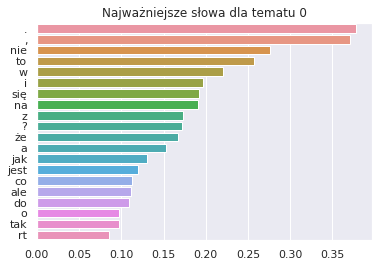

In [ ]:
import matplotlib.pyplot as plt
data = term_topic_matrix[f'Temat_0']
data = data.sort_values(ascending=False)
top_20 = data[:20]
plt.title('Najważniejsze słowa dla tematu 0')
sns.barplot(x=top_20.values, y=top_20.index)

# Tutaj wyplotowane najwazniejsze slowa dla tematu pierwszego

In [ ]:
print([feature_names[i] for i in svd.components_[1].argsort()[::-1]][:20])

['😁', '!', '😀', '?', 'no', 'to', 'hehehehehe', 'i', '😂', '👍', '🔯', '🐷', '🐑', '🥀', 'ja', '🐙', ' ', '🔫', 'tym', 'by']


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128077 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128303 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128017 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128055 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129344 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128025 missing from current font.
  fon

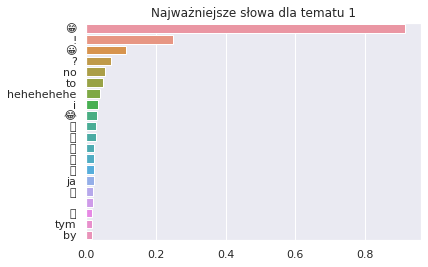

In [ ]:
data = term_topic_matrix[f'Temat_1']
data = data.sort_values(ascending=False)
top_20 = data[:20]
plt.title('Najważniejsze słowa dla tematu 1')
sns.barplot(x=top_20.values, y=top_20.index)

In [ ]:
print([feature_names[i] for i in svd.components_[9].argsort()[::-1]][:20])

['na', 'nie', '-', 'w', 'bo', '#', ':', '😁', 'pewno', ':)', 'że', 'ale', 'jest', 'mam', 'temat', 'wiem', 'może', 'żeby', 'ten', 'było']


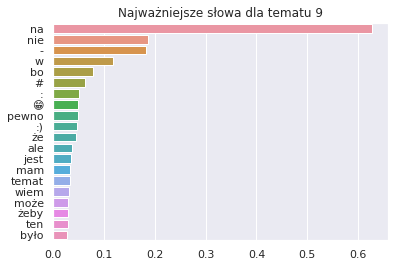

In [ ]:
data = term_topic_matrix[f'Temat_9']
data = data.sort_values(ascending=False)
top_20 = data[:20]
plt.title('Najważniejsze słowa dla tematu 9')
sns.barplot(x=top_20.values, y=top_20.index)

In [ ]:
print([feature_names[i] for i in svd.components_[29].argsort()[::-1]][:20])

['"', 'po', '\\', 'jest', ':', 'nie', 'za', 'tylko', 'tym', 'jak', 'd', 'na', 'być', 'prostu', '😀', 'do', 'dla', 'a', 'jeszcze', 'tam']


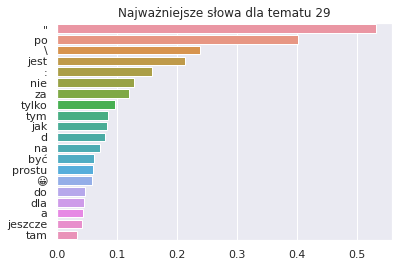

In [ ]:
data = term_topic_matrix[f'Temat_29']
data = data.sort_values(ascending=False)
top_10 = data[:20]
plt.title('Najważniejsze słowa dla tematu 29')
sns.barplot(x=top_10.values, y=top_10.index)

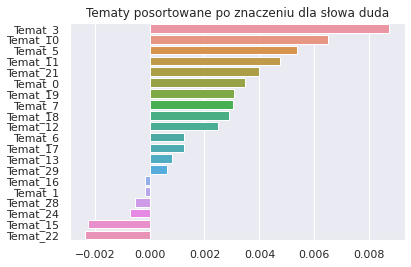

In [ ]:
data = term_topic_matrix.loc['duda']
data = data.sort_values(ascending=False)
top_20 = data[:20]
plt.title('Tematy posortowane po znaczeniu dla słowa duda')
sns.barplot(x=top_20.values, y=top_20.index)

In [ ]:
columns = [f'Temat_{r}' for r in range(0,svd.components_.T.shape[1])] # Wszystkie 30 zredukowane prez LSA tematy 

document_topic_matrix = pd.DataFrame(data=X_train_lsa,
                                 columns = columns) 

document_topic_matrix # Widzimy przetworzona macierz dla kazdego tematu z 30 tematow (kolumny) dla kazdego dokumentu (wiersze). Kazdy dokument to osobny wektor.

d = (i ** 2 for i in range(0,10000000000000000000000000))

print(d)


NameError: ignored

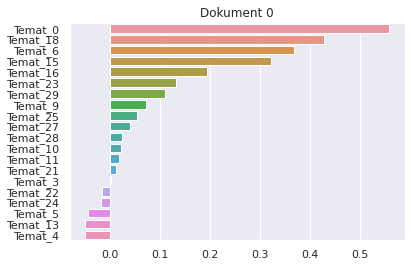

In [ ]:
data = document_topic_matrix.loc[0]
data = data.sort_values(ascending=False)
top_20 = data[:20]
plt.title('Dokument 0')
sns.barplot(x=top_20.values, y=top_20.index) # Widzimy posortowane znaczenie danych tematow (20 ich jest w sumie tutaj) w pierwszym dokumencie ktorych w sumie jest 7029

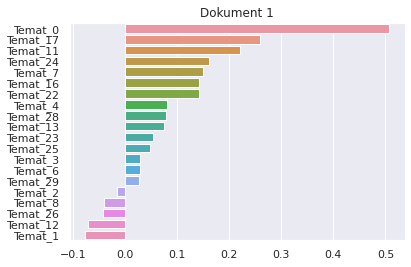

In [ ]:
data = document_topic_matrix.loc[1]
data = data.sort_values(ascending=False)
top_20 = data[:20]
plt.title('Dokument 1')
sns.barplot(x=top_20.values, y=top_20.index)

Model uczenia maszynowego zastosowany dla modeli TFIDF oraz SVD

In [ ]:
from sklearn.neighbors import KNeighborsClassifier



knn_tfidf = KNeighborsClassifier(n_neighbors=3, algorithm='brute', metric='cosine') # zdefiniowanie klasyfikatora Knn
knn_tfidf.fit(X_train_tfidf, y_train_labels) # Uczenie modelu na danych treningowych


X_test_tfidf = tfidf_vectorizer.transform(X_test_raw) # transformacja danych testowych na wektory dla modelu tfidf 

p = knn_tfidf.predict(X_test_tfidf) # Przewidywanie wynikow na zbiorze testowym przez klasyfikator knn


numRight = 0;
for i in range(0,len(p)):
    if p[i] == y_test_labels[i]:
        numRight += 1

print("  (%d / %d) poprawnie - %.2f%%" % (numRight, len(y_test_labels), float(numRight) / float(len(y_test_labels)) * 100.0)) # Liczenie accuracy modelu tfidf




  (1827 / 2008) poprawnie - 90.99%


In [ ]:
from sklearn import metrics

# AUC dla modelu KNN dla klasyfikatora przy uzyciu TFIDF

auc = metrics.roc_auc_score(y_test_labels, p)
auc 

0.5530595916277283

In [ ]:


knn_lsa = KNeighborsClassifier(n_neighbors=3, algorithm='brute', metric='cosine')
knn_lsa.fit(X_train_lsa, y_train_labels) #  trenowanie modelu svd na danych treningowych 


X_test_lsa = lsa.transform(X_test_tfidf)
p = knn_lsa.predict(X_test_lsa) # przewidywanie labeli (czy to byl hejt czy nie) modelu knn



numRight = 0;
for i in range(0,len(p)):
    if p[i] == y_test_labels[i]:
        numRight += 1

print("  (%d / %d) poprawnie - %.2f%%" % (numRight, len(y_test_labels), float(numRight) / float(len(y_test_labels)) * 100.0)) # Liczenie accuracy dla modelu svd

  (1802 / 2008) poprawnie - 89.74%


In [ ]:
# AUC dla modelu knn dla klasyfikatora SVD

auc = metrics.roc_auc_score(y_test_labels, p)
auc 

0.5249055879152531

MODEL NN zastosowany do modeli TFIDF oraz SVD

Epoch 1/10
214/214 [==============================] - 2s 8ms/step - loss: 0.5416 - accuracy: 0.7417 - val_loss: 0.3570 - val_accuracy: 0.9095
Epoch 2/10
214/214 [==============================] - 2s 10ms/step - loss: 0.3045 - accuracy: 0.9173 - val_loss: 0.2956 - val_accuracy: 0.9120
Epoch 3/10
214/214 [==============================] - 2s 8ms/step - loss: 0.2488 - accuracy: 0.9243 - val_loss: 0.2657 - val_accuracy: 0.9170
Epoch 4/10
214/214 [==============================] - 2s 10ms/step - loss: 0.2028 - accuracy: 0.9378 - val_loss: 0.2440 - val_accuracy: 0.9253
Epoch 5/10
214/214 [==============================] - 2s 8ms/step - loss: 0.1618 - accuracy: 0.9539 - val_loss: 0.2314 - val_accuracy: 0.9286
Epoch 6/10
214/214 [==============================] - 2s 8ms/step - loss: 0.1287 - accuracy: 0.9665 - val_loss: 0.2257 - val_accuracy: 0.9270
Epoch 7/10
214/214 [==============================] - 2s 8ms/step - loss: 0.1033 - accuracy: 0.9769 - val_loss: 0.2251 - val_accuracy: 0.9245
Epoc

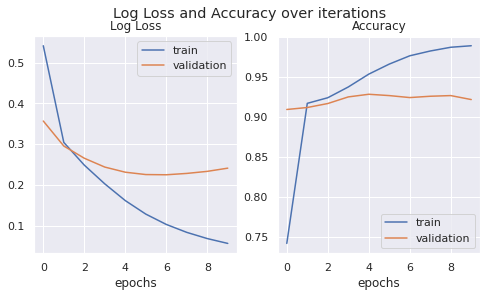

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense


X_train_tfidf_array = X_train_tfidf.toarray()

model = Sequential() #  NN model
model.add(Dense(10, activation='sigmoid')) # hidden layer
model.add(Dense(1, activation='sigmoid')) # output layer

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy']) # stworzenie modelu NN 
mymodel = model.fit(X_train_tfidf_array, y_train_labels, epochs=10, validation_split=0.15) # zastosowanie modelu NN do danych dla klasyfikatora TFIDF


# Stworzenie wykresu przedstawiajacego rozklad accuracy oraz loss dla modelu NN
def plot_loss_accuracy(loss, val_loss, acc, val_acc):
    fig = plt.figure(figsize=(8, 4))
    fig.suptitle('Log Loss and Accuracy over iterations')
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(loss)
    ax.plot(val_loss)
    ax.grid(True)
    ax.set(xlabel='epochs', title='Log Loss')
    ax.legend(['train', 'validation'], loc='upper right')
    
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(acc)
    ax.plot(val_acc)
    ax.grid(True)
    ax.set(xlabel='epochs', title='Accuracy')
    ax.legend(['train', 'validation'], loc='lower right')

plot_loss_accuracy(mymodel.history['loss'], 
                   mymodel.history['val_loss'], 
                   mymodel.history['accuracy'], 
                   mymodel.history['val_accuracy']) 


loss, accuracy = model.evaluate(X_test_tfidf.toarray(), y_test_labels) # policzenie accuracy oraz loss dla modelu NN dla TFIDF
print('Test loss:', loss)
print('Test accuracy:', accuracy)




Epoch 1/10
214/214 [==============================] - 1s 3ms/step - loss: 0.5351 - accuracy: 0.8011 - val_loss: 0.3864 - val_accuracy: 0.9095
Epoch 2/10
214/214 [==============================] - 1s 4ms/step - loss: 0.3314 - accuracy: 0.9162 - val_loss: 0.3130 - val_accuracy: 0.9095
Epoch 3/10
214/214 [==============================] - 0s 2ms/step - loss: 0.2925 - accuracy: 0.9162 - val_loss: 0.2996 - val_accuracy: 0.9095
Epoch 4/10
214/214 [==============================] - 0s 2ms/step - loss: 0.2839 - accuracy: 0.9162 - val_loss: 0.2964 - val_accuracy: 0.9095
Epoch 5/10
214/214 [==============================] - 0s 2ms/step - loss: 0.2813 - accuracy: 0.9162 - val_loss: 0.2949 - val_accuracy: 0.9095
Epoch 6/10
214/214 [==============================] - 0s 2ms/step - loss: 0.2797 - accuracy: 0.9162 - val_loss: 0.2936 - val_accuracy: 0.9095
Epoch 7/10
214/214 [==============================] - 0s 2ms/step - loss: 0.2784 - accuracy: 0.9162 - val_loss: 0.2924 - val_accuracy: 0.9095
Epoch 

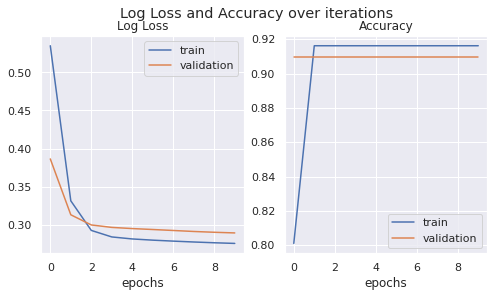

In [ ]:
model = Sequential() #  NN model
model.add(Dense(10, activation='sigmoid')) # hidden layer
model.add(Dense(1, activation='sigmoid')) # output layer

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy']) # Stworzenie modelu NN
mymodel = model.fit(X_train_lsa, y_train_labels, epochs=10, validation_split=0.15) # Zastosowanie modelu NN dla klasyfikatora SVD


def plot_loss_accuracy(loss, val_loss, acc, val_acc):
    fig = plt.figure(figsize=(8, 4))
    fig.suptitle('Log Loss and Accuracy over iterations')
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(loss)
    ax.plot(val_loss)
    ax.grid(True)
    ax.set(xlabel='epochs', title='Log Loss')
    ax.legend(['train', 'validation'], loc='upper right')
    
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(acc)
    ax.plot(val_acc)
    ax.grid(True)
    ax.set(xlabel='epochs', title='Accuracy')
    ax.legend(['train', 'validation'], loc='lower right')

plot_loss_accuracy(mymodel.history['loss'], 
                   mymodel.history['val_loss'], 
                   mymodel.history['accuracy'], 
                   mymodel.history['val_accuracy']) 


loss, accuracy = model.evaluate(X_test_lsa, y_test_labels) # policzenie loss i accuracy dla modelu SVD 
print('Test loss:', loss)
print('Test accuracy:', accuracy)



AUC dla modeli TFIDF oraz SVD

Epoch 1/10
214/214 [==============================] - 3s 10ms/step - loss: 0.2580 - auc: 0.7251 - val_loss: 0.2314 - val_auc: 0.8295
Epoch 2/10
214/214 [==============================] - 2s 9ms/step - loss: 0.1319 - auc: 0.9683 - val_loss: 0.2347 - val_auc: 0.8189
Epoch 3/10
214/214 [==============================] - 2s 9ms/step - loss: 0.0751 - auc: 0.9914 - val_loss: 0.2641 - val_auc: 0.8112
Epoch 4/10
214/214 [==============================] - 2s 9ms/step - loss: 0.0466 - auc: 0.9975 - val_loss: 0.2967 - val_auc: 0.7985
Epoch 5/10
214/214 [==============================] - 2s 9ms/step - loss: 0.0312 - auc: 0.9990 - val_loss: 0.3342 - val_auc: 0.7869
Epoch 6/10
214/214 [==============================] - 2s 9ms/step - loss: 0.0220 - auc: 0.9995 - val_loss: 0.3722 - val_auc: 0.7621
Epoch 7/10
214/214 [==============================] - 2s 9ms/step - loss: 0.0160 - auc: 0.9998 - val_loss: 0.4032 - val_auc: 0.7508
Epoch 8/10
214/214 [==============================] - 2s 9ms/step - loss: 0

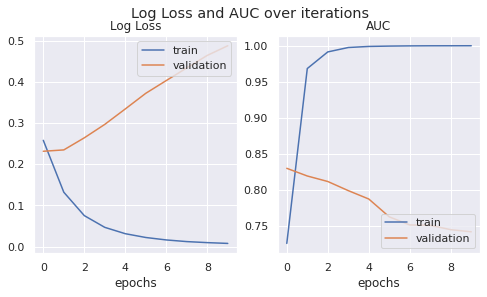

In [ ]:
model = Sequential() #  NN model
model.add(Dense(100, activation='sigmoid')) # hidden layer
model.add(Dense(1, activation='sigmoid')) # output layer

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['AUC']) # Stworzenie modelu NN dla klasyfikatora TFIDF, tym razem zastosowalem miare AUC 
mymodel = model.fit(X_train_tfidf_array, y_train_labels, epochs=10, validation_split=0.15) # zastosowanie modelu NN dla klasyfikatora TFIDF 


def plot_loss_accuracy(loss, val_loss, auc, val_auc):
    fig = plt.figure(figsize=(8, 4))
    fig.suptitle('Log Loss and AUC over iterations')
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(loss)
    ax.plot(val_loss)
    ax.grid(True)
    ax.set(xlabel='epochs', title='Log Loss')
    ax.legend(['train', 'validation'], loc='upper right')
    
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(auc)
    ax.plot(val_auc)
    ax.grid(True)
    ax.set(xlabel='epochs', title='AUC')
    ax.legend(['train', 'validation'], loc='lower right')

plot_loss_accuracy(mymodel.history['loss'], 
                   mymodel.history['val_loss'], 
                   mymodel.history['auc'], 
                   mymodel.history['val_auc']) 


loss, auc = model.evaluate(X_test_tfidf.toarray(), y_test_labels) # Policzenie loss oraz AUC dla modelu NN
print('Test loss:', loss)
print('Test AUC:', auc)



Epoch 1/10
214/214 [==============================] - 1s 3ms/step - loss: 0.3932 - auc: 0.4978 - val_loss: 0.3272 - val_auc: 0.5507
Epoch 2/10
214/214 [==============================] - 0s 2ms/step - loss: 0.2981 - auc: 0.5300 - val_loss: 0.3021 - val_auc: 0.6122
Epoch 3/10
214/214 [==============================] - 0s 2ms/step - loss: 0.2852 - auc: 0.6209 - val_loss: 0.2982 - val_auc: 0.6425
Epoch 4/10
214/214 [==============================] - 0s 2ms/step - loss: 0.2821 - auc: 0.6524 - val_loss: 0.2966 - val_auc: 0.6571
Epoch 5/10
214/214 [==============================] - 0s 2ms/step - loss: 0.2804 - auc: 0.6687 - val_loss: 0.2951 - val_auc: 0.6709
Epoch 6/10
214/214 [==============================] - 0s 2ms/step - loss: 0.2790 - auc: 0.6764 - val_loss: 0.2934 - val_auc: 0.6790
Epoch 7/10
214/214 [==============================] - 0s 2ms/step - loss: 0.2777 - auc: 0.6802 - val_loss: 0.2921 - val_auc: 0.6809
Epoch 8/10
214/214 [==============================] - 0s 2ms/step - loss: 0.

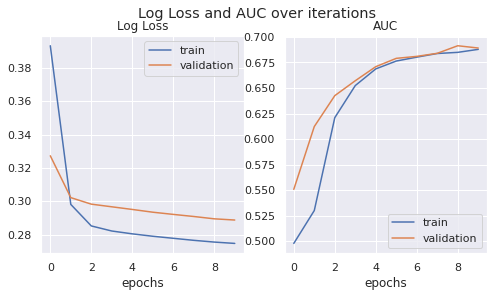

In [ ]:
model = Sequential() #  NN model
model.add(Dense(10, activation='sigmoid')) # hidden layer
model.add(Dense(1, activation='sigmoid')) # output layer

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['AUC'])
mymodel = model.fit(X_train_lsa, y_train_labels, epochs=10, validation_split=0.15) # Tym razem zastosowanie modelu NN dla modelu SVD przy uzyciu miary AUC


def plot_loss_accuracy(loss, val_loss, auc, val_auc):
    fig = plt.figure(figsize=(8, 4))
    fig.suptitle('Log Loss and AUC over iterations')
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(loss)
    ax.plot(val_loss)
    ax.grid(True)
    ax.set(xlabel='epochs', title='Log Loss')
    ax.legend(['train', 'validation'], loc='upper right')
    
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(auc)
    ax.plot(val_auc)
    ax.grid(True)
    ax.set(xlabel='epochs', title='AUC')
    ax.legend(['train', 'validation'], loc='lower right')

plot_loss_accuracy(mymodel.history['loss'], 
                   mymodel.history['val_loss'], 
                   mymodel.history['auc'], 
                   mymodel.history['val_auc']) 


loss, auc = model.evaluate(X_test_lsa, y_test_labels)
print('Test loss:', loss)
print('Test AUC:', auc)


FASTTEXT

In [ ]:
!python3 -m pip install fasttext

In [ ]:
import fasttext

def prepare_data(y, X, saved_data):


  data_list = []

  for i in zip(y, X):
    data_list.append(["__label__"+str(i[0])]+spacy_tokeniser(i[1]))
  np_list = np.array(data_list, dtype = list)
  np.random.shuffle(np_list)

  for _, i in enumerate(np_list):
    saved_data.write(" ".join(i) + '\n')


In [ ]:
with open('train_data.txt', 'w') as train_data:
  prepare_data(y_train_labels, X_train_raw, train_data)

with open('test_data.txt', 'w') as test_data:
  prepare_data(y_test_labels, X_test_raw, test_data)

In [ ]:
!head train_data.txt

__label__0 @anonymized_account nie wiem dlaczego tak jest ale cieszę się , że nie jestem w tym sama XD
__label__0 @anonymized_account @anonymized_account Houston pracuje nad tym żeby to inaczej przedstawić :)
__label__0 @anonymized_account @anonymized_account @anonymized_account Nie ma to jak samozachwyt
__label__0 @anonymized_account Nie , będę siedział i patrzył jak zaraza pisowska się rozprzestrzenia
__label__0 @anonymized_account Rawie jak od trolla z San escobar
__label__0 @anonymized_account @anonymized_account Mniej TVNu więcej własnych przemyśleń.\nRadosnego świętowania życzę .
__label__0 @anonymized_account Nie bardzo , bo chodzi o to , żeby mu trochę pomóc finansowo , bo ma ciężko , a reklamował się , jako złota rączka 🤔 🤪
__label__0 @anonymized_account Hehehehehe . Szarańczę każdy pozna z daleka po odnózach i czółkach 😁 😁 😁 😁
__label__0 @anonymized_account Bo z legia nieliczcie na karnego z varu 😞
__label__0 @anonymized_account Od meczu z Pogonią gramy ciągle taką samą chujn

In [ ]:
!head test_data.txt

__label__0 @anonymized_account @anonymized_account Ja zaraz zaczynam :) muszę jeszcze przyszykować garnitur 😂
__label__0 @anonymized_account @anonymized_account Z całym szacunkiem , ale staże w klubach zagranicznych nie mogą być argumentem za .
__label__0 @anonymized_account @anonymized_account @anonymized_account Na razie to Wy się pchacie pod tweety o Jagiellonii , wszechmistrzowie 😉
__label__0 @anonymized_account a skąd , gdzie ja do baletu :-)
__label__0 RT @anonymized_account rozjebala się jak Rosja na mapie i siedzi kurwa
__label__0 @anonymized_account Za to on jest mistrzem we wszystkim i jest najmądrzejszy .
__label__0 @anonymized_account @anonymized_account @anonymized_account @anonymized_account Niedawno narzekałeś , że nie zwraca się uwagi na różne szczegóły 😜
__label__0 @anonymized_account a wiadomo co z Korczyńskim ?
__label__0 Koleżanka z która nie gadałam miesiąc chyba wysłała mi 👋 na messengerze i odrazu „ o kurwa przepraszam ”
__label__0 @anonymized_account a co w Lech

In [ ]:
ft_model = fasttext.train_unsupervised('train_data.txt', model='skipgram', dim=300, minn=2, maxn=5, epoch=10, lr=0.1, thread=1)

In [ ]:
print(ft_model.words)

['@anonymized_account', '</s>', '.', ',', 'nie', 'to', 'w', '?', 'na', 'i', 'się', 'z', 'że', 'do', '!', 'jak', 'jest', '😁', 'a', 'co', ':)', 'o', 'RT', 'ale', 'A', 'za', '😂', 'tak', '-', 'ma', 'po', 'bo', 'Nie', 'już', 'tylko', '#', 'czy', 'To', 'tym', 'ze', '"', 'mi', 'od', 'będzie', 'dla', 'też', 'ja', 'tego', 'mnie', 'W', 'Ale', 'No', 'I', 'było', 'ten', 'jeszcze', 'może', 'mam', 'tam', 'chyba', 'teraz', 'coś', 'Jak', ':', 'być', 'sobie', 'by', 'są', '/', 'był', '😀', 'żeby', 'Tak', '😉', 'wiem', 'te', 'go', 'ty', 'ktoś', 'przez', 'nic', 'Z', 'można', 'takie', 'Bo', '…', 'Ja', 'Na', 'no', 'bez', 'Co', 'więc', 'bardzo', ';-)', 'O', 'Ty', 'niż', 'mu', 'trzeba', 'tu', 'masz', 'jesteś', 'wszystko', 'kto', 'dobrze', 'gdzie', 'jestem', 'Pan', 'nawet', 'taki', 'u', 'meczu', 'ich', 'sie', 'mają', 'tej', 'więcej', 'lat', 'przy', 'chodzi', 'który', 'mecz', 'chce', ')', 'była', 'albo', '3', 'dzisiaj', 'nas', 'miał', 'pewnie', ':D', 'Ci', 'przecież', ';)', '%', 'zawsze', 'jego', 'dziś', 'roku', 

In [ ]:
def cosine_similarity(a, b):
    cos_sim = np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b))
    return cos_sim

In [ ]:
cosine_similarity(ft_model['duda'],ft_model['kaczyński'])

0.45086494

In [ ]:
ft_model.get_nearest_neighbors('duda') #podobne słowa 

[(0.8589339852333069, 'da'),
 (0.7876693606376648, 'Duda'),
 (0.7834876179695129, 'dupa'),
 (0.7483006715774536, 'Zgoda'),
 (0.719277024269104, 'dupę'),
 (0.6951697468757629, 'tępa'),
 (0.6792673468589783, 'dawna'),
 (0.6130924820899963, 'burdelu'),
 (0.6128621697425842, 'kasa'),
 (0.6088149547576904, 'Kuba')]

In [ ]:
ft_model.get_analogies("informatyk", "mężczyzna", "kobieta")

[(0.6687583923339844, 'kobiet'),
 (0.6450343728065491, 'kobiety'),
 (0.6105153560638428, 'kobieto'),
 (0.5839511752128601, 'zrób'),
 (0.577655017375946, 'budżetu'),
 (0.5660333037376404, 'dividetourwarsaw'),
 (0.5624083280563354, 'polityk'),
 (0.5603219270706177, 'politykę'),
 (0.52825528383255, 'niepodległości'),
 (0.5275274515151978, 'robicie')]

In [ ]:
ft_classifier = fasttext.train_supervised(input="train_data.txt", epoch = 100) # Trenowanie klasyfikatora fasttext przy uzyciu supervised learning na zbiorze treningowym

In [ ]:
ft_classifier.test('test_data.txt') # testowanie klasyfikatora w oparciu o dane ze zbioru treningowego

(2008, 0.9267928286852589, 0.9267928286852589)

WORD2VEC

In [ ]:
tokenised_data = []
tokenised_data += [spacy_tokeniser(sent) for sent in df_train['sentence'].to_list()]

len(tokenised_data)

10041

In [ ]:
tokenised_data[0]

['Dla',
 'mnie',
 'faworytem',
 'do',
 'tytułu',
 'będzie',
 'Cracovia',
 '.',
 'Zobaczymy',
 ',',
 'czy',
 'typ',
 'się',
 'sprawdzi',
 '.']

In [ ]:
# Inicjalizacja i trenowanie modelu word2vec

from gensim.models import Word2Vec

# inicjalizujemy model, dla którego wejściem jest lista tokenised_data
# okno kontekstowe ma rozmiar 3
# odrzucamy słowa rzadkie (mające mniej niż 2 wystąpienia)
# workers=1 oznacza, że nie zrównoleglamy trenowania (przyspiesza trenowania w przypadku dużego zbioru treningowego)
model_w2v = Word2Vec(tokenised_data, window=3, min_count=2)
model_w2v.train(tokenised_data, total_examples=len(tokenised_data), epochs=1000)

(88092223, 143029000)

In [ ]:
model_w2v.predict_output_word(["pociąg"])

[('masz', 0.6778663),
 ('o', 0.15256798),
 ('jutro', 0.11399256),
 ('Dlaczego', 0.042884484),
 ('domu', 0.002552663),
 ('dobrze', 0.002403352),
 ('nazywa', 0.0015005314),
 ('niedługo', 0.00086311385),
 ('za', 0.0005715153),
 ('mam', 0.00032418763)]

In [ ]:
w2v2 = model_w2v.wv

In [ ]:
w2v2.most_similar('kobieta')

[('scena', 0.3957064151763916),
 ('wyjść', 0.3914053440093994),
 ('godności', 0.38523566722869873),
 ('WISŁA', 0.3693441152572632),
 ('pieska', 0.3562132716178894),
 ('Liga', 0.3550335764884949),
 ('książka', 0.3533662259578705),
 ('marsz', 0.35069501399993896),
 ('urojenia', 0.3504752516746521),
 ('honoru', 0.3502483069896698)]

In [ ]:
w2v2.doesnt_match(['kobieta',  'mężczyzna', 'mężczyźnie', 'kobiecie'])

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'kobieta'